### Code to generate the data:
python -m grid --n 4 interface "python SVC.py --dataset interface --dist normal --test 1 --pte 10000 --kernel laplace --sigma 0.01 --bias 0" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 8 10 20 30 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [2]:
dataset = "small_sigma"

data = dict()
ds = utils.get_argument(dataset, "d")
for d in ds:
    dic = {"d": d}
    data_ = utils.get_test_error(dataset, dic)
    data[d] = utils.class_data(data_, dic, "ptr")

/home/jonas/local/py3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


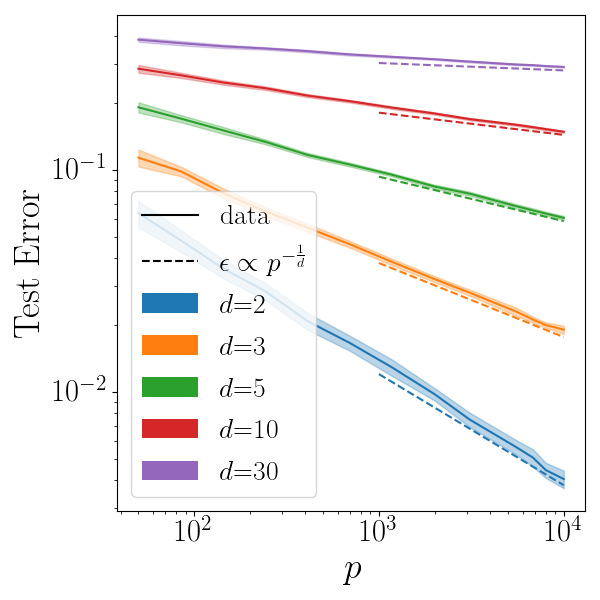

In [3]:
%matplotlib notebook

#ds = utils.get_argument(dataset, "d")
ds = [2, 3, 5, 10 , 30]

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\epsilon \propto p^{-\frac{1}{d}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

pf = {2: .38, 3: .38, 5: .37, 8: .36, 10: .36, 20: .37, 30: .38}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):
    
    ps, means = utils.get_mean(data[d])
    ps, stds = utils.get_std(data[d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    # benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d] * x ** (-1 / d)
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=26)
ax.set_ylabel(r"Test Error", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)

plt.legend(handles=labels, loc="lower left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure".format(dataset), format="pdf")

<IPython.core.display.Javascript object>


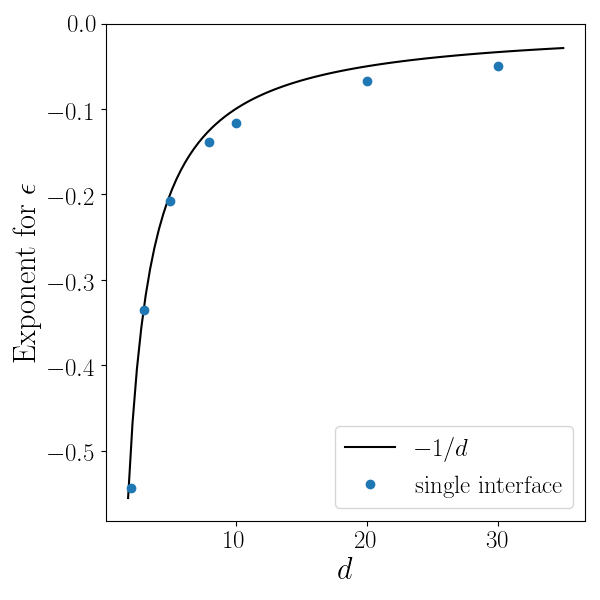

In [45]:
%matplotlib notebook

imin = {2: 6, 3: 6, 5: 6, 8: 6, 10: 6, 20: 6, 30: 6}
beta = list()
ds = utils.get_argument(dataset, "d")
for d in ds:
    ps, means = utils.get_mean(data[d])
    _beta = np.polyfit(np.log10(ps[imin[d]:]), np.log10(means[imin[d]:]), 1)[0]
    beta.append(_beta)

labels = [Line2D([0], [0], c='k', ls='-', label=r"$-1/d$"),
          Line2D([0], [0], c='C0', ls='None', marker='o', label=r"single interface")]

fig, ax = plt.subplots(figsize=(6, 6))

# benchmark
x = np.linspace(1.8, 35, 100)
y = -1 / x
ax.plot(x, y, ls='-', c='k')
#data
ax.plot(ds, beta, marker='o', ls='None', c=r"C0")

ax.set_xlabel(r"$d$", fontsize=22)
ax.set_ylabel(r"Exponent for $\epsilon$", fontsize=22)
ax.set(xscale='linear', yscale='linear')
ax.tick_params(labelsize=18)
ax.set_ylim(ymax=0)

plt.legend(handles=labels, loc="lower right", fontsize=18)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")